In [244]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

mouse_df = pd.read_csv("data/Mouse_metadata.csv")
results_df = pd.read_csv("data/Study_results.csv")
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [245]:
results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [246]:
merge_df = pd.merge(mouse_df,results_df,on="Mouse ID",how="left") #merge tables
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [270]:
# Generate a summary statistics table consisting of the mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each drug regimen.

#drug_stats = merge_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].describe()
#drug_stats["SEM"] = merge_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()
#drug_stats
# 'Median','Variance','Std Dev','SEM'
# 
drug_mean = merge_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
drug_stats = pd.DataFrame({'Mean':drug_mean,
                           'Median':merge_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median(),
                           'Variance':merge_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var(),
                           'Std Dev':merge_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std(),
                           'SEM':merge_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()
                          })

drug_stats

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


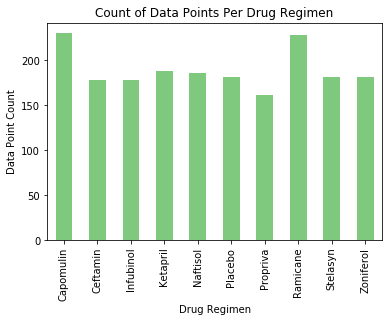

In [447]:
# Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the 
# number of data points for each treatment regimen.
# NOTE:** These plots should look identical.
#from matplotlib import cm

drug_count = merge_df.groupby('Drug Regimen')['Mouse ID'].count()

# DataFrame Plot
drug_ct_bar = drug_count.plot(kind='bar',colormap='Accent')
drug_ct_bar.set_xlabel("Drug Regimen")
drug_ct_bar.set_ylabel("Data Point Count")
drug_ct_bar.set_title("Count of Data Points Per Drug Regimen")
plt.show()

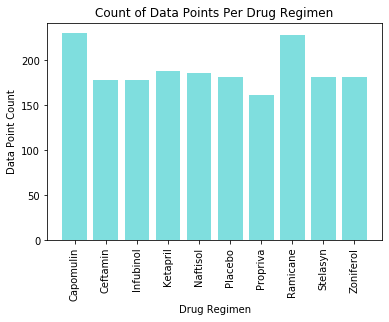

In [448]:
# Matplotlib's pyplot

x_axis = np.arange(len(drug_count))
pyplot_count = plt.bar(x_axis, drug_count, color='c', alpha=0.5, align="center")
tick_loc = [value for value in x_axis]
plt.xticks(tick_loc, drug_count.index, rotation=90)
plt.title("Count of Data Points Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Point Count")
plt.show()

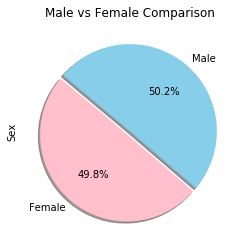

In [449]:
# Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows 
# the distribution of female or male mice in the study.
# NOTE:** These plots should look identical.

gender_s = mouse_df.groupby('Sex')['Sex'].count()

# DataFrame plot

explode = (0.05,0)
colors = ["pink","skyblue"]
genderdf_pie = gender_s.plot.pie(explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
genderdf_pie.set_title("Male vs Female Comparison")
plt.show()

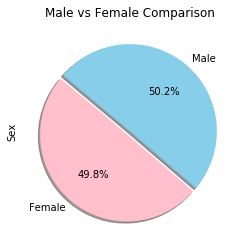

In [450]:
# Matplotlib pyplot
gender_s
labels= ['Female','Male']
genderplt_pie = plt.pie(gender_s, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Male vs Female Comparison")
plt.ylabel("Sex")
plt.show()

In [385]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and 
# quantitatively determine if there are any potential outliers across all four treatment regimens.

mouse_tumor = merge_df[['Drug Regimen','Mouse ID','Timepoint','Tumor Volume (mm3)',]]
drug_top4 = mouse_tumor[(mouse_tumor['Drug Regimen']=="Capomulin")| 
                        (mouse_tumor['Drug Regimen']=="Ramicane")| 
                        (mouse_tumor['Drug Regimen']=="Infubinol")|
                        (mouse_tumor['Drug Regimen']=="Ceftamin")]
drug_top4.sort_values(['Mouse ID','Timepoint'],ascending=[False,False])
mouse_group = drug_top4.groupby('Mouse ID')
#for key,value in mouse_group:
 #   print('GroupName: ',key)
  #  print(value)
   # print('---------------------')
final_tumor = mouse_group.last()
print(final_tumor)


         Drug Regimen  Timepoint  Tumor Volume (mm3)
Mouse ID                                            
a203        Infubinol         45           67.973419
a251        Infubinol         45           65.525743
a275         Ceftamin         45           62.999356
a411         Ramicane         45           38.407618
a444         Ramicane         45           43.047543
...               ...        ...                 ...
y769         Ceftamin         45           68.594745
y793        Capomulin         45           31.896238
y865         Ceftamin         45           64.729837
z578         Ramicane         45           30.638696
z581        Infubinol         45           62.754451

[100 rows x 3 columns]


Index(['Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)'], dtype='object')

In [386]:
Q1 = final_tumor.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile(0.25)
Q2 = final_tumor.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile(0.5)
Q3 = final_tumor.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile(0.75)
IQR = Q3 - Q1

print(f"The lower quartile of Tumor Volume by drug is: \n{round(Q1,2)}")
print(f"The upper quartile of Tumor Volume by drug is: \n{round(Q3,2)}")
print(f"The interquartile range of Tumor Volume by drug is: \n{round(IQR,2)}")
print(f"The the median of Tumor Volume by drug is: \n{round(Q2,2)} ")

lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)
print(f"Values below these could be outliers. \n{round(lower_bound,2)}")
print(f"Values above these could be outliers. \n{round(upper_bound,2)}")

The lower quartile of Tumor Volume by drug is: 
Drug Regimen
Capomulin    32.38
Ceftamin     48.72
Infubinol    54.05
Ramicane     31.56
Name: Tumor Volume (mm3), dtype: float64
The upper quartile of Tumor Volume by drug is: 
Drug Regimen
Capomulin    40.16
Ceftamin     64.30
Infubinol    65.53
Ramicane     40.66
Name: Tumor Volume (mm3), dtype: float64
The interquartile range of Tumor Volume by drug is: 
Drug Regimen
Capomulin     7.78
Ceftamin     15.58
Infubinol    11.48
Ramicane      9.10
Name: Tumor Volume (mm3), dtype: float64
The the median of Tumor Volume by drug is: 
Drug Regimen
Capomulin    38.13
Ceftamin     59.85
Infubinol    60.17
Ramicane     36.56
Name: Tumor Volume (mm3), dtype: float64 
Values below these could be outliers. 
Drug Regimen
Capomulin    20.70
Ceftamin     25.36
Infubinol    36.83
Ramicane     17.91
Name: Tumor Volume (mm3), dtype: float64
Values above these could be outliers. 
Drug Regimen
Capomulin    51.83
Ceftamin     87.67
Infubinol    82.74
Ramicane

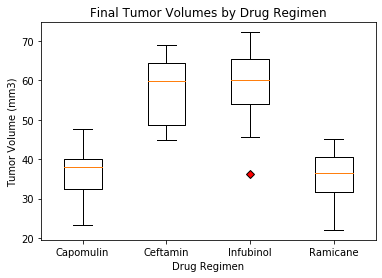

In [442]:
# Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens 
# and highlight any potential outliers in the plot by changing their color and style.

Capomulin = final_tumor[final_tumor['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)']
Ceftamin = final_tumor[final_tumor['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)']
Infubinol = final_tumor[final_tumor['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)']
Ramicane = final_tumor[final_tumor['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)']

red_x = dict(markerfacecolor='r', marker='D')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Final Tumor Volumes by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot([Capomulin, Ceftamin, Infubinol, Ramicane], labels=['Capomulin', 'Ceftamin', 'Infubinol','Ramicane'], 
           flierprops=red_x)
plt.show()

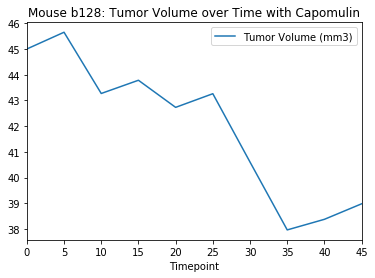

In [453]:
# Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.
cap_mouse = mouse_tumor[(mouse_tumor['Drug Regimen']=="Capomulin")]
cap_mouse.iloc[137] # find a mouse
mouse_b128 = cap_mouse[(cap_mouse['Mouse ID']=='b128')]
b128_chart = mouse_b128.plot.line(x='Timepoint',y='Tumor Volume (mm3)')
b128_chart.set_title("Mouse b128: Tumor Volume over Time with Capomulin")
plt.show()

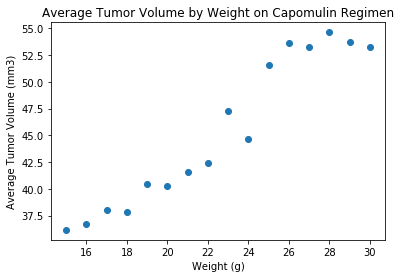

In [451]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
mouse_g_mm = merge_df[['Mouse ID','Drug Regimen','Weight (g)','Tumor Volume (mm3)']]
cap_g_mm = mouse_g_mm[(mouse_g_mm['Drug Regimen']=="Capomulin")]
g_mm = merge_df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()
g_mm

plt.scatter(g_mm.index,g_mm)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight on Capomulin Regimen")
plt.show()

The correlation between weight and volume for Capomulin treatment is: 0.96
y =1.41x + 13.61


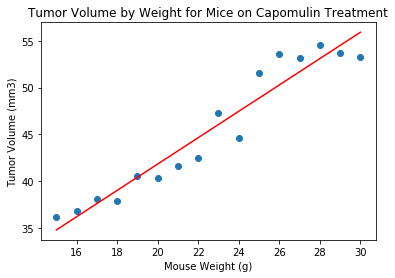

In [455]:
# Calculate the correlation coefficient and linear regression model between mouse weight and average tumor 
# volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.
import scipy.stats as st
from scipy.stats import linregress

g_mm 
weight = g_mm.index
volume = g_mm
correlation = st.pearsonr(weight,volume)
print(f"The correlation between weight and volume for Capomulin treatment is: {round(correlation[0],2)}")

x_value = g_mm.index
y_value = g_mm
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
regress_eq = x_value*slope + intercept
line_eq = print("y =" + str(round(slope,2)) + "x + " + str(round(intercept,2)))

plt.scatter(x_value,y_value)
plt.plot(x_value,regress_eq,"r-")
plt.annotate(line_eq,(24,30),fontsize=10,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume by Weight for Mice on Capomulin Treatment')
plt.show()